In [5]:
import torch

In [6]:
x=torch.Tensor([2,3])
y=torch.Tensor([4,5])
print(x*y)

tensor([ 8., 15.])


In [7]:
x=torch.zeros([3,4])

In [8]:
print(x)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [9]:
x.shape

torch.Size([3, 4])

In [10]:
y=torch.rand([4,5])

In [11]:
print(y)

tensor([[0.6590, 0.5981, 0.5561, 0.5707, 0.1230],
        [0.8470, 0.8749, 0.7548, 0.3238, 0.5399],
        [0.0507, 0.9516, 0.0466, 0.8328, 0.8832],
        [0.5707, 0.5996, 0.1355, 0.0504, 0.2328]])


In [12]:
y=y.view([1,20])
print(y)

tensor([[0.6590, 0.5981, 0.5561, 0.5707, 0.1230, 0.8470, 0.8749, 0.7548, 0.3238,
         0.5399, 0.0507, 0.9516, 0.0466, 0.8328, 0.8832, 0.5707, 0.5996, 0.1355,
         0.0504, 0.2328]])


In [13]:
y=y.view([5,4])
print(y)

tensor([[0.6590, 0.5981, 0.5561, 0.5707],
        [0.1230, 0.8470, 0.8749, 0.7548],
        [0.3238, 0.5399, 0.0507, 0.9516],
        [0.0466, 0.8328, 0.8832, 0.5707],
        [0.5996, 0.1355, 0.0504, 0.2328]])


In [14]:
import torchvision
from torchvision import transforms, datasets

In [15]:
import torch.nn as nn
import torch.nn.functional as F

DATA- AQUISITION OF DATA, PREPROCESSING THE DATA AND ITERATE OVER DATA
TORCHVISION - COLLECTION OF DATA THAT IS USED FOR VISION TASK 

In [16]:
import torch
import torchvision
from torchvision import transforms, datasets

In [17]:
train=datasets.MNIST('',train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))

In [18]:
test=datasets.MNIST('',train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

load this data into another type of object which can help us to iterate over this data

In [19]:
trainset=torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset=torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

batch_size - how many items you are feeding into the model at a time

shuffle - to reduce overfitting and generalisation of the model

*iterating over data*

In [20]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [21]:
x,y = data[0][1],data[1][1]
print(y)

tensor(4)


In [22]:
import matplotlib.pyplot as plt

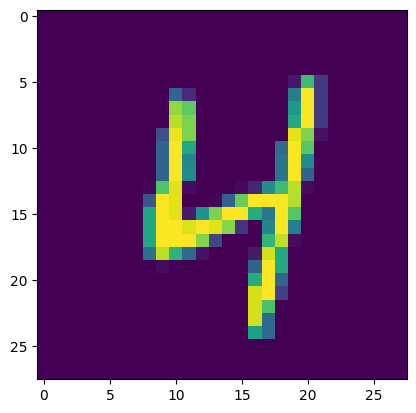

In [23]:
plt.imshow(x.view(28,28))
plt.show()

balancing of data

In [24]:
total=0
counter_dict={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
    xs,ys = data
    for y in ys:
        counter_dict[int(y)]+=1
        total+=1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [25]:
for i in counter_dict:
    print(f'{i}:{counter_dict[i]/total*100}')

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


In [26]:
import torch.nn as nn  #like OOPS
import torch.nn.functional as F  #like functions

in functional you will always has to pass parameters and for nns you will just initialize things

**model building**

The torch.nn import gives us access to some helpful neural network things, such as various neural network layer types (things like regular fully-connected layers, convolutional layers (for imagery), recurrent layers...etc). For now, we've only spoken about fully-connected layers, so we will just be using those for now.

The torch.nn.functional area specifically gives us access to some handy functions that we might not want to write ourselves. We will be using the relu or "rectified linear" activation function for our neurons. Instead of writing all of the code for these things, we can just import them, since these are things everyone will be needing in their deep learning code.

In [27]:
class Net(nn.Module):  #inherit from nn. module
    
    def __init__(self):
        super().__init__()  #running the intialization for nn.module and whatevefr you had put in __init__ runs the initialization method of the parent class from where are you inheriting
        # self.fc1=nn.Linear(input,output)
        # three layers of 64 neurons
        self.fc1=nn.Linear(28*28,64)  #for convolutional nn.calm
        self.fc2=nn.Linear(64,64)
        self.fc3=nn.Linear(64,64)
        self.fc4=nn.Linear(64,10)

    # building a feed-forward neural network means that the data is passing in one direction
    def forward(self,x):   #x=input dataset
        # x=self.fc1(x)  #we forgot our activation function so the data will not be scaled properly
        x=F.relu(self.fc1(x))   #relu-rectified linear- activation function
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)

        return F.log_softmax(x,dim=1)


net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [28]:
X=torch.rand(28*28)

In [29]:
X=X.view(-1,28*28)

In [30]:
output=net(X)

In [31]:
output

tensor([[-2.2231, -2.3630, -2.3366, -2.2171, -2.4605, -2.4358, -2.2301, -2.1275,
         -2.3120, -2.3711]], grad_fn=<LogSoftmaxBackward0>)

loss-measure of how wrong is the model goal loss to decrease
optimizer- adjust weights and biases based on the loss and the gradients
time to reduce the loss with the help of optimizers - learning rate

In [37]:
import torch.optim as optim

optimizer=optim.Adam(net.parameters(), lr= 0.001)
# net.parameters[]- everything that can be adjustible in the model
# learning rate-steps you are taking to reach the minima of the optimization curve
# we do not optimize for accuracy we optimize for loss
# a full pass through a data is called epoch
EPOCHS=3
for epoch in range(EPOCHS):
    for data in trainset:
        X,y = data
        net.zero_grad()
# why to pass data in batches- it reduces the training time and helps in generalizing
        output = net(X.view(-1, 28*28))
        loss= F.nll_loss(output, y)
        # there are two ways to calculate loss one is  based on one-hot vectors but our dataset is a scalar value with just one hot use nll_loss
        loss.backward()
        optimizer.step()  #this willa djust the weights for us

    print(loss)

tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.1722, grad_fn=<NllLossBackward0>)
tensor(0.0165, grad_fn=<NllLossBackward0>)


In [38]:
correct=0
total = 0
# validate our data testing data do not optimize based on this data and see the accuracy of the model
with torch.no_grad():
    for data in trainset:
        X,y = data
        output=net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1

print("Accuracy: ",round(correct/total*100,2))


Accuracy:  98.79


***CONVOLUTIONAL LAYERS***

convolutional neural networks are doing better than the recurrent neural networks int he sequential types of data

for the convolutional layers you will have to pass the image as it is and not like to flatten it as we have done for fully connected layers

when we convolve an image we are trying to extract features of that image. A window = kernel. extract featrues and then generates a scalar

After convolution do pooling= max pooling(general)

In [2]:
import os

In [3]:
import cv2

In [4]:
import numpy as np

In [5]:
from tqdm import tqdm

In [6]:
REBUILD_DATA=True

class DogsVSCats():
    IMG_SIZE=50
    CATS = 'cats'
    DOGS = 'dogs'
    LABELS = {CATS:0, DOGS:1}
    catcount=0
    dogcount=0
    training_data=[]
    def make_training_data(self):  #iterating over the directory
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):   
                #iterating over the images in the directories
                try:
                    # (os.listdir(label) it is the directory
                    path=os.path.join(label, f)
                    img= cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    # color add channels to the conv net but not the dimensions
                    img=cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
                    self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])
                    if label == self.CATS:
                        self.catcount +=1
                    elif label == self.DOGS:
                        self.dogcount +=1
            
                except Exception as e:
                    pass

        np.random.shuffle(self.training_data)
        np.save('training_data.npy', np.array(self.training_data, dtype=object), allow_pickle=True)
        print('CATS: ', self.catcount)
        print('DOGS: ', self.dogcount)
            
if REBUILD_DATA:
    dogsvscats = DogsVSCats()
    dogsvscats.make_training_data()
                    


cats


100%|██████████| 1012/1012 [00:11<00:00, 84.82it/s]


dogs


100%|██████████| 1013/1013 [00:09<00:00, 111.60it/s]


CATS:  1011
DOGS:  1012


In [7]:
training_data = np.load("training_data.npy",allow_pickle=True)

In [41]:
print(len(training_data))

2023


In [8]:
print(training_data[0])

[array([[114, 110,  93, ...,  65,  66,  72],
        [116, 111,  95, ...,  72,  70,  73],
        [116, 109, 103, ...,  70,  70,  74],
        ...,
        [138, 135, 127, ..., 170, 255, 255],
        [142, 135, 115, ..., 159, 253, 255],
        [141, 133, 136, ..., 159, 254, 254]], dtype=uint8) array([1., 0.])]


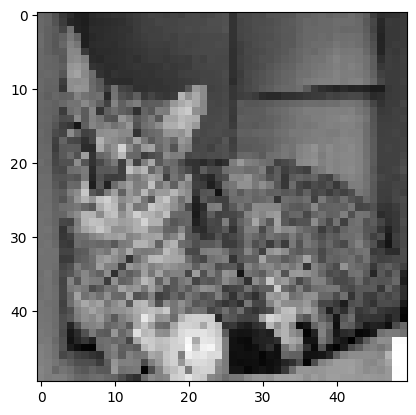

[1. 0.]


In [9]:
import matplotlib.pyplot as plt

plt.imshow(training_data[0][0], cmap='gray')
plt.show()
print(training_data[0][1])

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [19]:
class Net(nn.Module) :
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,32,5)   #5= kernel size
        self.conv2 = nn.Conv2d(32,64,5)
        self.conv3 = nn.Conv2d(64,128,5)
        
        x=torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)
        self.fc1 = nn.Linear(self._to_linear,512)
        self.fc2 = nn.Linear(512,2)

    def convs(self, x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv3(x)),(2,2))

        print(x[0].shape)

        if self._to_linear is None:
            self._to_linear= x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
         # so we reshape to be flattened as when it comes out of the convs  it is not flat yet
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)

net=Net()

torch.Size([128, 2, 2])


In [12]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)
loss_function=nn.MSELoss()

x=torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
x=x/255
y=torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(x)*VAL_PCT)
print(val_size)

202


C:\Users\archa\AppData\Local\Temp\ipykernel_19020\2499149120.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  x=torch.Tensor([i[0] for i in training_data]).view(-1,50,50)


In [24]:
train_x = x[:-val_size]
train_y = y[:-val_size]
test_x = x[-val_size:]
test_y = y[-val_size:]
print(len(train_x))
print(len(test_x))

1821
202


In [25]:
train_y.shape

torch.Size([1821, 2])

In [30]:
Batch_size = 100
EPOCHS = 2

for epoch in range(EPOCHS):
    for i in tqdm(range(0,len(train_x),Batch_size)):
        # print(i,i+Batch_size)
        # we are going to start from 0 till len(train_x and we will take the stpes of BATCH_SIZE )
        batch_x = train_x[i:i+Batch_size].view(-1,1,50,50)
        batch_y = train_y[i:i+Batch_size]
        # fitment optimization - zero the gradients
        
        net.zero_grad()
        outputs = net(batch_x)
        loss=loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()

print(loss)

  5%|▌         | 1/19 [00:00<00:05,  3.26it/s]

torch.Size([128, 2, 2])


 11%|█         | 2/19 [00:00<00:04,  4.06it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 21%|██        | 4/19 [00:00<00:03,  4.25it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 32%|███▏      | 6/19 [00:01<00:02,  4.78it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 42%|████▏     | 8/19 [00:01<00:02,  5.10it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 53%|█████▎    | 10/19 [00:02<00:01,  5.38it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 63%|██████▎   | 12/19 [00:02<00:01,  5.62it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 74%|███████▎  | 14/19 [00:02<00:00,  5.55it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 84%|████████▍ | 16/19 [00:03<00:00,  5.29it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


100%|██████████| 19/19 [00:03<00:00,  5.36it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  5%|▌         | 1/19 [00:00<00:03,  5.90it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 16%|█▌        | 3/19 [00:00<00:02,  6.15it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 26%|██▋       | 5/19 [00:00<00:02,  6.09it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 37%|███▋      | 7/19 [00:01<00:01,  6.06it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 47%|████▋     | 9/19 [00:01<00:01,  5.83it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 58%|█████▊    | 11/19 [00:01<00:01,  5.77it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 68%|██████▊   | 13/19 [00:02<00:01,  5.82it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 79%|███████▉  | 15/19 [00:02<00:00,  5.84it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 89%|████████▉ | 17/19 [00:02<00:00,  5.85it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


100%|██████████| 19/19 [00:03<00:00,  6.15it/s]

torch.Size([128, 2, 2])
tensor(0.2523, grad_fn=<MseLossBackward0>)


need to learn about .eval() and .train() and about dropouts

In [32]:
# testing
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_x))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_x[i].view(-1,1,50,50))[0]
        predicted_class = torch.argmax(net_out)
        if predicted_class == real_class:
            correct+=1
        total+=1

print('ACCURACY = ', round(correct/total,3))

 28%|██▊       | 56/202 [00:00<00:00, 305.29it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

100%|██████████| 202/202 [00:00<00:00, 456.70it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

In [33]:
torch.cuda.is_available()

False

In [ ]:
device = torch.device('cuda:0')

In [34]:
.to(device)

SyntaxError: invalid syntax (1248460579.py, line 1)

In [35]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')
    print('running on cpu')

running on cpu


In [36]:
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

In [ ]:
def train(net):
    optimizer = optim.Adam(net.parameters(),lr=0.001)
    loss_function=nn.MSELoss()
    for epoch in range(EPOCHS):
    for i in tqdm(range(0,len(train_x),Batch_size)):
        # print(i,i+Batch_size)
        # we are going to start from 0 till len(train_x and we will take the stpes of BATCH_SIZE )
        batch_x = train_x[i:i+Batch_size].view(-1,1,50,50)
        batch_y = train_y[i:i+Batch_size]
        # fitment optimization - zero the gradients
        
        net.zero_grad()
        outputs = net(batch_x)
        loss=loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()

    print(loss)

train(net)

In [ ]:
def test(net):
    # testing
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_x))):
            real_class = torch.argmax(test_y[i]).to(device)
            net_out = net(test_x[i].view(-1,1,50,50).to(device))[0]
            predicted_class = torch.argmax(net_out)
            if predicted_class == real_class:
                correct+=1
            total+=1

    print('ACCURACY = ', round(correct/total,3))

test(net)

IN AND OUT SAMPLE ACCURACY AND LOSS - THESE FOUR THINGS TELLS THAT HOW LONG WE SHOULD TRAIN THE MODEL AND WHAT MODEL IS THE BEST IF WE ARE TRYING TO SOLVE THE SAME TASK WITH DIFFERENT MODELS 

we want to do the test while we are training / granular testing

In [2]:
import os
import cv2
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
import torch.optim as optim

REBUILD_DATA=False

class DogsVSCats():
    IMG_SIZE=50
    CATS = 'cats'
    DOGS = 'dogs'
    LABELS = {CATS:0, DOGS:1}
    catcount=0
    dogcount=0
    training_data=[]
    def make_training_data(self):  #iterating over the directory
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):   
                #iterating over the images in the directories
                try:
                    # (os.listdir(label) it is the directory
                    path=os.path.join(label, f)
                    img= cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    # color add channels to the conv net but not the dimensions
                    img=cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
                    self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])
                    if label == self.CATS:
                        self.catcount +=1
                    elif label == self.DOGS:
                        self.dogcount +=1
            
                except Exception as e:
                    pass

        np.random.shuffle(self.training_data)
        np.save('training_data.npy', np.array(self.training_data, dtype=object), allow_pickle=True)
        print('CATS: ', self.catcount)
        print('DOGS: ', self.dogcount)
            
if REBUILD_DATA:
    dogsvscats = DogsVSCats()
    dogsvscats.make_training_data()
                    
training_data = np.load("training_data.npy",allow_pickle=True)

print(len(training_data))

class Net(nn.Module) :
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,32,5)   #5= kernel size
        self.conv2 = nn.Conv2d(32,64,5)
        self.conv3 = nn.Conv2d(64,128,5)
        
        x=torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)
        self.fc1 = nn.Linear(self._to_linear,512)
        self.fc2 = nn.Linear(512,2)

    def convs(self, x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv3(x)),(2,2))

        print(x[0].shape)

        if self._to_linear is None:
            self._to_linear= x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
         # so we reshape to be flattened as when it comes out of the convs  it is not flat yet
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)

net=Net()

optimizer = optim.Adam(net.parameters(),lr=0.001)
loss_function=nn.MSELoss()

x=torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
x=x/255
y=torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(x)*VAL_PCT)
print(val_size)

train_x = x[:-val_size]
train_y = y[:-val_size]
test_x = x[-val_size:]
test_y = y[-val_size:]
print(len(train_x))
print(len(test_x))

Batch_size = 100
EPOCHS = 2

# for epoch in range(EPOCHS):
#     for i in tqdm(range(0,len(train_x),Batch_size)):
#         # print(i,i+Batch_size)
#         # we are going to start from 0 till len(train_x and we will take the stpes of BATCH_SIZE )
#         batch_x = train_x[i:i+Batch_size].view(-1,1,50,50)
#         batch_y = train_y[i:i+Batch_size]
#         # fitment optimization - zero the gradients
        
#         net.zero_grad()
#         outputs = net(batch_x)
#         loss=loss_function(outputs, batch_y)
#         loss.backward()
#         optimizer.step()

# print(loss)

# # testing
# correct = 0
# total = 0
# with torch.no_grad():
#     for i in tqdm(range(len(test_x))):
#         real_class = torch.argmax(test_y[i])
#         net_out = net(test_x[i].view(-1,1,50,50))[0]
#         predicted_class = torch.argmax(net_out)
#         if predicted_class == real_class:
#             correct+=1
#         total+=1

# print('ACCURACY = ', round(correct/total,3))

2023
torch.Size([128, 2, 2])
202
1821
202


C:\Users\archa\AppData\Local\Temp\ipykernel_20224\3342240839.py:91: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:257.)
  x=torch.Tensor([i[0] for i in training_data]).view(-1,50,50)


In [3]:
def forward_pass(x,y, train=False):
    # when we pass data through here by default we will not update weights
    if train:
        net.zero_grads()
    outputs=net(x)
    # regardless of the fact that data is in sample or out of sample we are going to calculate accuracy and we will compare two
    # beacuse most of the time in sample accuracy will be greater than out of sample accuracy
    matches = [torch.argmax(i) == torch.argmax(j) for i, j in zip(outputs, y)]
    acc = matches.count(True)/len(matches)
    loss=loss_function(outputs, y)

    if train:
        loss.backward()
        optimizer.step()
    return acc,loss

In [13]:
def test(size=32):
    random_start=np.random.randint(len(test_x).size)
    x,y = test_x[random_start:random_start+size],test_y[random_start:random_start+size]
    with torch.no_grad():
        val_acc, val_loss = forward_pass(x.view(-1,1,50,50), y)
    return val_acc, val_loss

val_acc, val_loss = test(size=100)
print(val_acc, val_loss)

AttributeError: 'int' object has no attribute 'size'

In [14]:
import time

In [ ]:
model_name = f"model - {int(time.time())}"  # everytime you run a model or make a new model it will have a new time so the data will not crash with each other and the model will be saved with diff name
net=Net()
optimizer = optim.Adam(net.parameters(),lr=0.001)
loss_function=nn.MSELoss()

print(model_name)

def train():
    Batch_size = 100
    EPOCHS = 5
    with open("model.log","a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0,len(train_x),Batch_size)):
                batch_x = train_x[i:i+Batch_size].view(-1,1,50,50)
                batch_y = train_y[i:i+Batch_size]

                acc, loss = forward_pass(batch_x,batch_y, train=True)
                if i%50 == 0
                val_acc, val_loss = forward_pass(size=100)
                # save it to that file
                f.write(f"{model_name}, {round(time.time(),3)},{round(float(acc),2)},{round(float(loss),4)}")

